In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df = pd.read_csv(r'C:\Users\scrap\OneDrive\Desktop\vgsales.csv', index_col = False)

In [4]:
df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
sub = df[['Year', 'NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

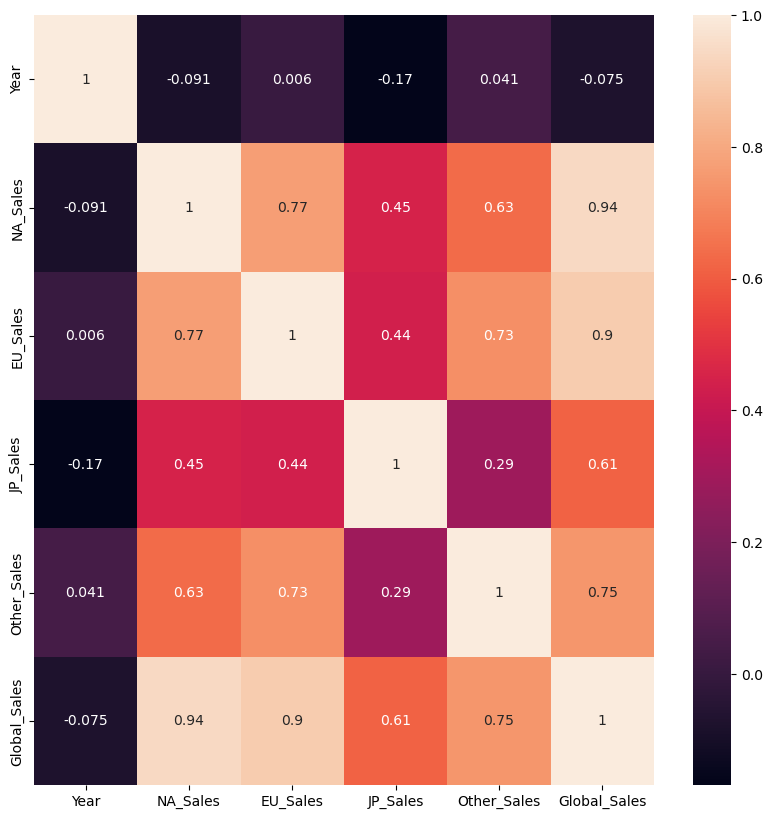

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [ ]:
#It seems that NA_Sales and Global_Sales have the highest correlation to each other while the NA_Sales and Year have the weakest correlation.

C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


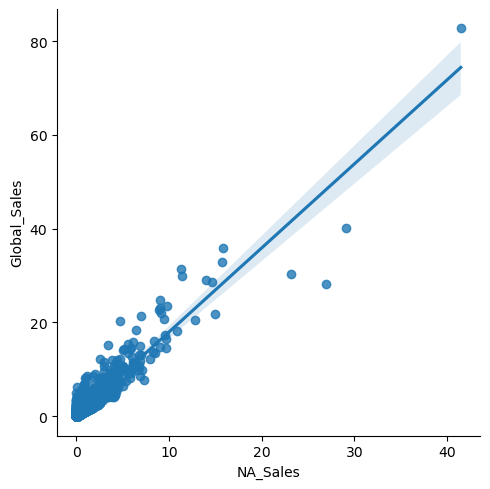

In [11]:
sns.lmplot(x = 'NA_Sales', y = 'Global_Sales', data = df)

In [26]:
#You can see the positive correlation here, the outlier is the 82.9 million sales from Global.

In [13]:
sub_2 = df[['Year', 'NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

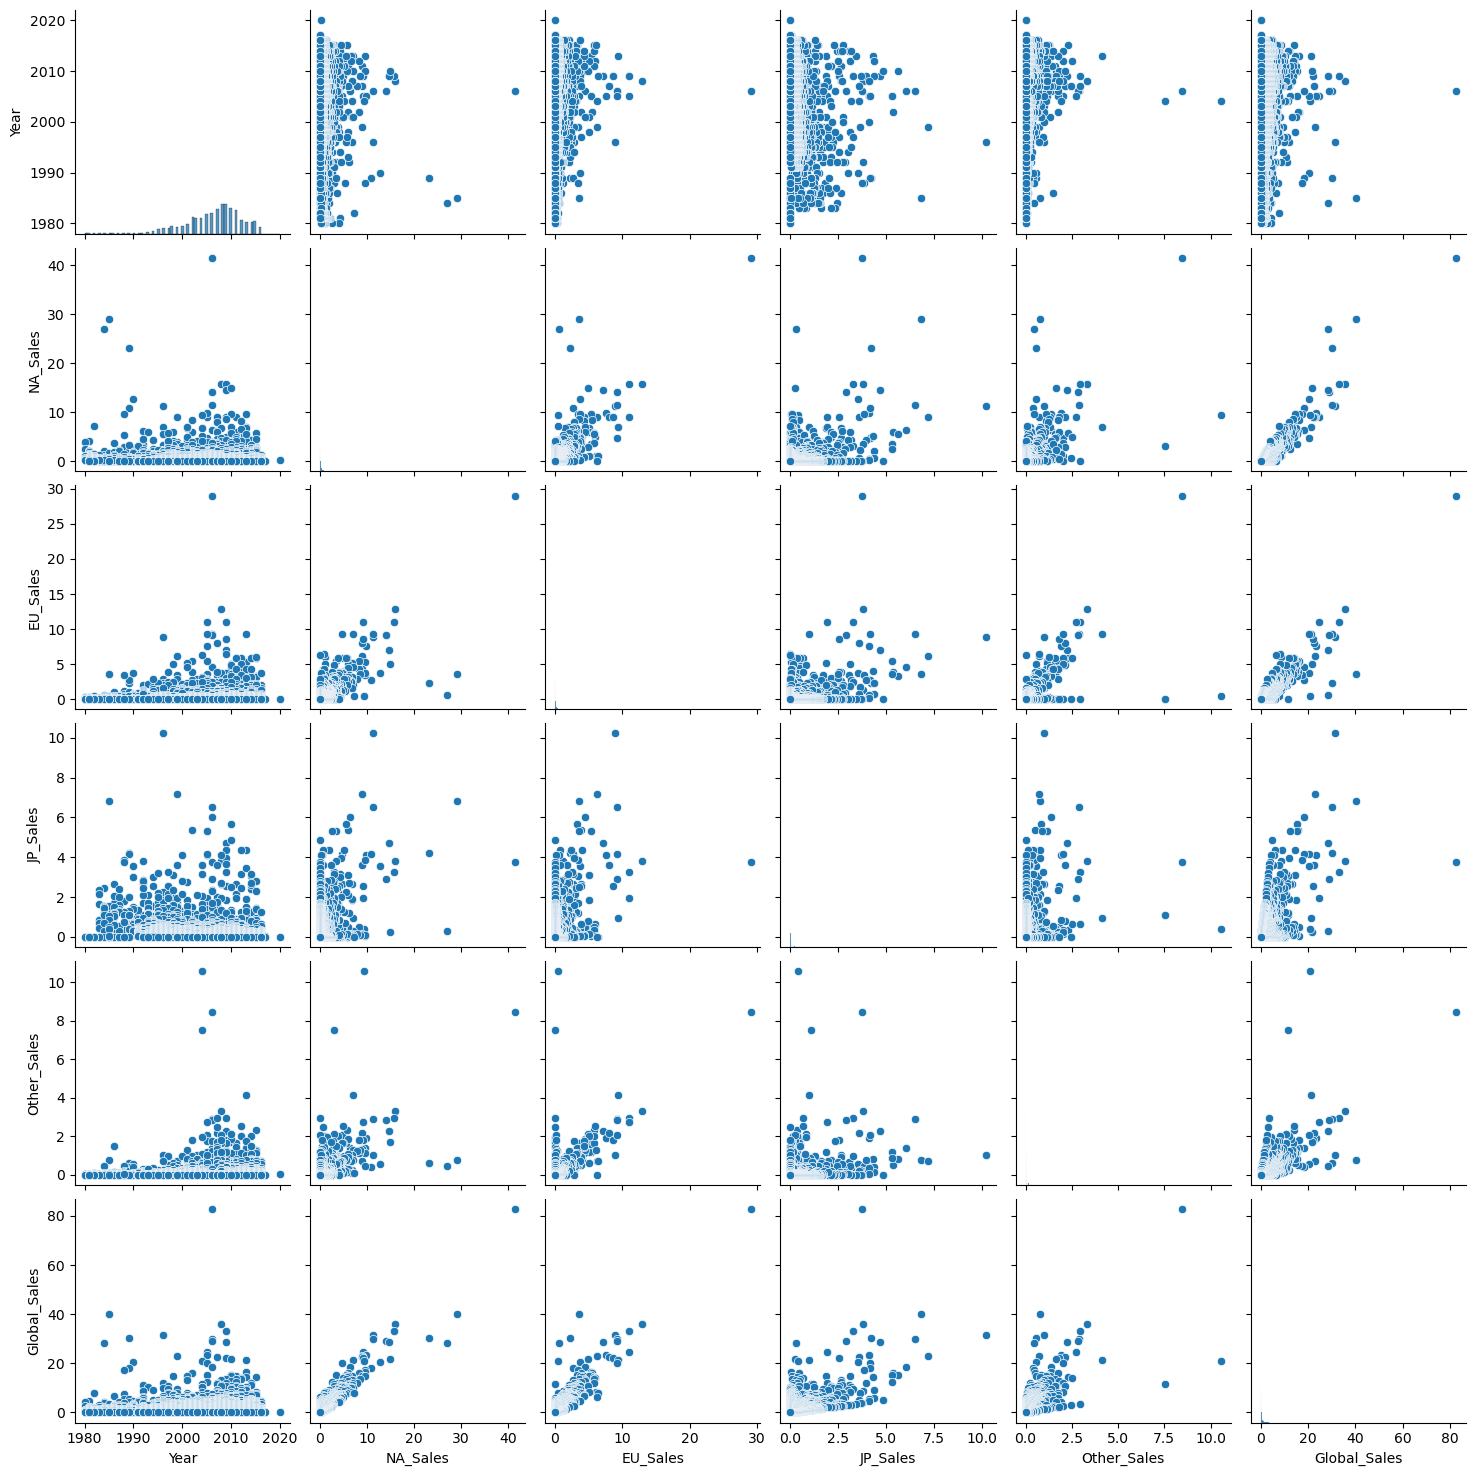

In [14]:
g = sns.pairplot(sub_2)

In [15]:
#The variable I want to explore the most is Other_Sales. It has the most outliers and im curious as to why that is.

C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Count'>

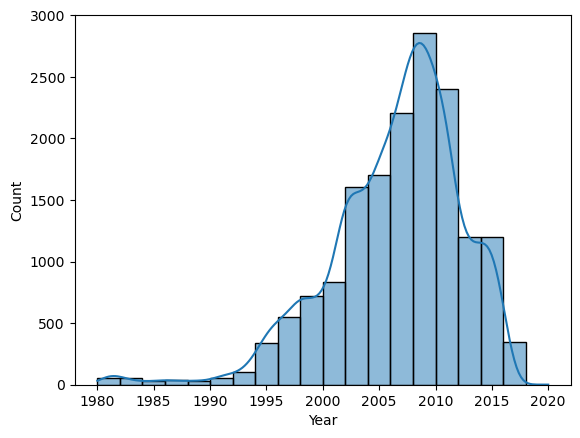

In [28]:
sns.histplot(df['Year'], bins = 20, kde = True)

In [29]:
df.loc[df['Year'] < 2000, 'Year category'] = 'Classic'

C:\Users\scrap\AppData\Local\Temp\ipykernel_11592\678638983.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Classic' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Year'] < 2000, 'Year category'] = 'Classic'


In [30]:
df.loc[(df['Year'] >= 2000) & (df['Year'] < 2010), 'Year category'] = 'Mid Year'

In [31]:
df.loc[df['Year'] > 2010, 'Year category'] = 'New-Age'

C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

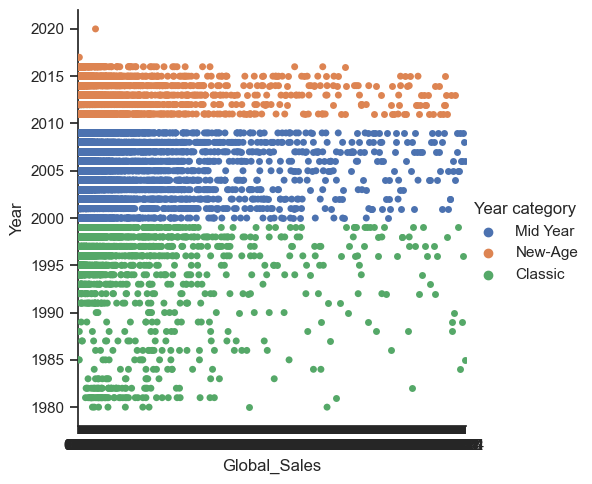

In [32]:
sns.set(style="ticks")
g = sns.catplot(x="Global_Sales", y="Year", hue="Year category", data=df)

In [33]:
df.to_csv(os.path.join(r'C:\Users\scrap\OneDrive\Desktop\Exercise_6.2_task.csv'))

In [34]:
#I did see which regions were doing the best in sales which is honestly the most important aspect. NA takes the lead for the highest sales.